<a href="https://colab.research.google.com/github/Mohammed-safuvan07/Category_prediction_App/blob/main/Deepmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)


100%|██████████| 1.03G/1.03G [00:34<00:00, 31.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [ ]:
import os
# letter = 'C'
# # dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
# dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train"
# folder_path = os.path.join(dataset_path, letter)
# folder_path



dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
letter = "C"

folder_path = os.path.join(dataset_path, letter)
print(os.listdir(folder_path))  # ✅ works


['C1717.jpg', 'C2229.jpg', 'C2884.jpg', 'C1467.jpg', 'C381.jpg', 'C1889.jpg', 'C669.jpg', 'C2195.jpg', 'C411.jpg', 'C212.jpg', 'C2697.jpg', 'C2812.jpg', 'C1145.jpg', 'C1219.jpg', 'C2630.jpg', 'C439.jpg', 'C986.jpg', 'C1640.jpg', 'C2280.jpg', 'C761.jpg', 'C2568.jpg', 'C2162.jpg', 'C2216.jpg', 'C1881.jpg', 'C1205.jpg', 'C560.jpg', 'C142.jpg', 'C1837.jpg', 'C2213.jpg', 'C2054.jpg', 'C444.jpg', 'C1731.jpg', 'C2261.jpg', 'C1244.jpg', 'C351.jpg', 'C153.jpg', 'C1381.jpg', 'C587.jpg', 'C1536.jpg', 'C875.jpg', 'C2358.jpg', 'C1866.jpg', 'C198.jpg', 'C1414.jpg', 'C890.jpg', 'C23.jpg', 'C675.jpg', 'C923.jpg', 'C2410.jpg', 'C2941.jpg', 'C1465.jpg', 'C276.jpg', 'C2580.jpg', 'C2975.jpg', 'C1952.jpg', 'C2408.jpg', 'C410.jpg', 'C1192.jpg', 'C1006.jpg', 'C2457.jpg', 'C1097.jpg', 'C2653.jpg', 'C1339.jpg', 'C1721.jpg', 'C1367.jpg', 'C2687.jpg', 'C113.jpg', 'C487.jpg', 'C2267.jpg', 'C2764.jpg', 'C1654.jpg', 'C663.jpg', 'C699.jpg', 'C558.jpg', 'C1187.jpg', 'C2487.jpg', 'C2429.jpg', 'C602.jpg', 'C2050.jpg', 

In [ ]:
file_name = os.listdir(folder_path)[20]
img_path = os.path.join(folder_path, file_name)
img_path

'/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/C/C2568.jpg'

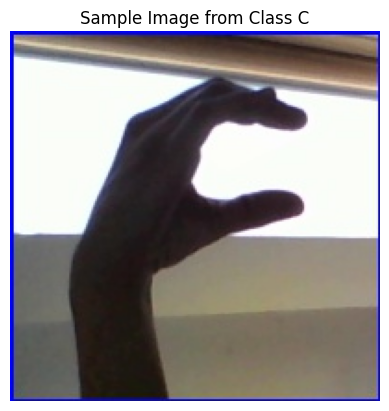

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Sample Image from Class {letter}")
plt.axis('off')
plt.show()

In [ ]:
classes = ['A', 'B', 'C', 'F', 'K', 'Y']
selected_data = {}
for ltr in classes:
  folder_path1 = os.path.join(dataset_path,ltr)
  images = []
  for img_file in  os.listdir(folder_path)[:6]:
    img_path1 = os.path.join(folder_path1,img_file)
    img = cv2.imread(img_path1)
    images.append(img)
  selected_data[ltr] = images

In [ ]:
selected_data

{'A': [array([[[254,   4,   0],
          [255,   2,   0],
          [246,   0,   2],
          ...,
          [244,   0,   9],
          [252,   0,   5],
          [254,   0,   2]],
  
         [[254,   6,   0],
          [234,   1,   0],
          [214,   8,  20],
          ...,
          [187,   3,  11],
          [211,   1,   7],
          [224,   3,   7]],
  
         [[240,   0,   0],
          [206,   9,  11],
          [206, 102, 113],
          ...,
          [167, 100, 107],
          [216,  90,  96],
          [167,  12,  17]],
  
         ...,
  
         [[241,   0,   2],
          [197,   9,   8],
          [255, 218, 207],
          ...,
          [194, 162, 173],
          [255, 162, 167],
          [153,  14,  17]],
  
         [[250,   2,   1],
          [215,   4,   0],
          [255, 209, 200],
          ...,
          [255, 159, 167],
          [255, 152, 154],
          [178,  10,   9]],
  
         [[252,   3,   0],
          [224,   4,   0],
          [179,  11

In [ ]:
for k,v in selected_data.items():
  print(f'{k} : {len(v)}')

A : 6
B : 6
C : 6
F : 6
K : 6
Y : 6


In [ ]:
import numpy as np
def load_dataset(dataset_path,classes,img_size=(50,50)):
  images = []
  labels = []
  for idx,letter in enumerate(classes):
    folder_path = os.path.join(dataset_path,letter)
    for img_file in os.listdir(folder_path)[:250]:
      img_path = os.path.join(folder_path,img_file)
      img = cv2.imread(img_path)
      img = cv2.resize(img,img_size)
      images.append(img)
      labels.append(idx)
  return np.array(images),np.array(labels)


In [ ]:
X,Y = load_dataset(dataset_path,classes)
print('x shape',X.shape)
print('y shape', Y.shape)
print(Y)

x shape (1500, 50, 50, 3)
y shape (1500,)
[0 0 0 ... 5 5 5]


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
X1 = X/255.0
Y1 = to_categorical(Y, num_classes=len(classes))
Y1

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=42)
print('x_train',X1_train.shape)
print('y_train',Y1_train.shape)
print('x_test',X1_test.shape)
print('y_test',Y1_test.shape)

x_train (1200, 50, 50, 3)
y_train (1200, 6)
x_test (300, 50, 50, 3)
y_test (300, 6)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,526 (3.86 MB)

 Trainable params: 1,011,526 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X1_train, Y1_train, epochs=10, batch_size=32, validation_split=0.1)
history

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.2301 - loss: 1.8214 - val_accuracy: 0.5250 - val_loss: 1.4101
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.5826 - loss: 1.2323 - val_accuracy: 0.7583 - val_loss: 0.8565
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7776 - loss: 0.7418 - val_accuracy: 0.8250 - val_loss: 0.5458
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8798 - loss: 0.4329 - val_accuracy: 0.8417 - val_loss: 0.4840
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9000 - loss: 0.3235 - val_accuracy: 0.8417 - val_loss: 0.4072
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9466 - loss: 0.1827 - val_accuracy: 0.8167 - val_loss: 0.4308
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9613 - loss: 0.1475 - val_accuracy: 0.8333 - val_loss: 0.5375
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9608 - loss: 0.1406 - val_accuracy: 0.8833

In [ ]:
loss, acc = model.evaluate(X1_test, Y1_test)
print(f"Test Accuracy: {acc:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9461 - loss: 0.1987
Test Accuracy: 0.94


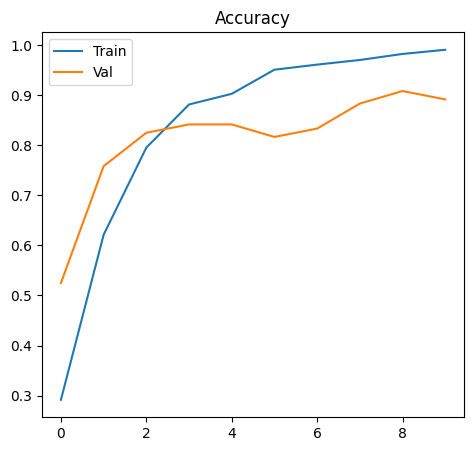

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

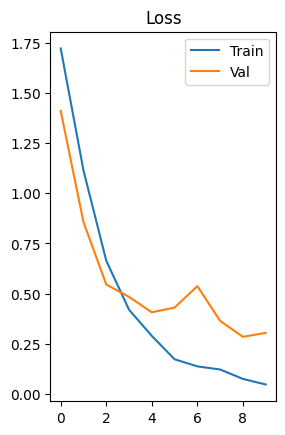

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('asl_gesture_model.h5')


In [ ]:

from tensorflow.keras.models import load_model
model1 = load_model('asl_gesture_model.h5')

<IPython.core.display.Javascript object>

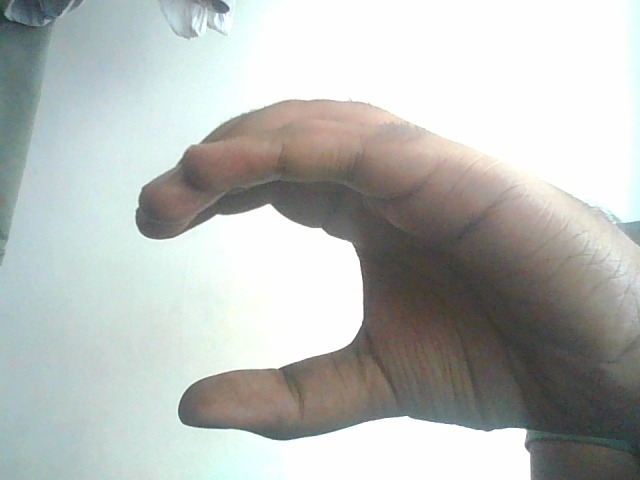

In [ ]:
from google.colab import output
from IPython.display import display, Javascript
from google.colab import files
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ✅ Load Model
model = tf.keras.models.load_model('asl_gesture_model.h5')
keep_classes = ['A', 'B', 'C', 'F', 'K', 'Y']  # Use same as training

# ✅ Code to Capture Image from Webcam
def capture_image():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Resize the output to 400px
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for capture button to be clicked
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            const img = canvas.toDataURL('image/jpeg');
            google.colab.kernel.invokeFunction('notebook.take_photo', [img], {});
        }
        takePhoto();
    ''')
    display(js)

def take_photo(photo_path='captured_photo.jpg'):
    from base64 import b64decode
    import IPython.display
    import PIL.Image
    from io import BytesIO

    def _take_photo(img):
        img_bytes = b64decode(img.split(',')[1])
        with open(photo_path, 'wb') as f:
            f.write(img_bytes)
        display(IPython.display.Image(photo_path))

    output.register_callback('notebook.take_photo', _take_photo)
    capture_image()

# ✅ Take Photo using Webcam
take_photo('my_input.jpg')

# ✅ Load & Predict



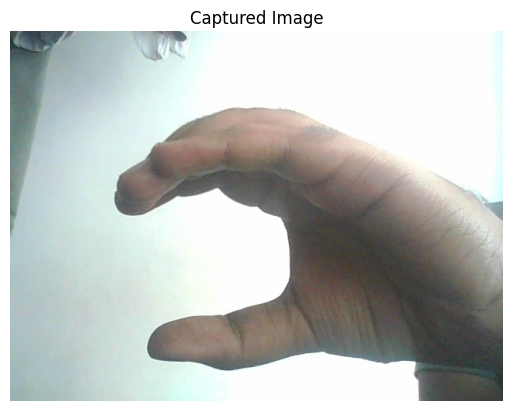

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Sign: C


In [ ]:
img = cv2.imread('my_input.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Captured Image")
plt.axis('off')
plt.show()

# ✅ Preprocess
img_resized = cv2.resize(img, (50, 50))
img_normalized = img_resized / 255.0
img_input = np.expand_dims(img_normalized, axis=0)

# ✅ Predict
prediction = model.predict(img_input)
class_index = np.argmax(prediction)
class_label = keep_classes[class_index]
print(f"Predicted Sign: {class_label}")

In [ ]:
from collections import Counter
print(Counter(Y))  # y_train should be class labels (before one-hot)


Counter({np.int64(0): 250, np.int64(1): 250, np.int64(2): 250, np.int64(3): 250, np.int64(4): 250, np.int64(5): 250})
